# Check example MESMER-M data from Shruti:

**her initial message**:

example dataset that we would provide from MESMER-M to the glacier models. I realised I never clarified two points:

- The temperatures are given as anomalies with reference period 1850-1900
- So far I calculate the quantiles for each ESM, I think this makes sense as each ESM has it's own regional physics that should be equally represented. Let me know if you would like something more condensed however (e.g. perhaps pooling together ESMs of similar genealogies)

Let me know if the above two are O.K. The example dataset is for the region: North Andes, ESM: ACCESS-CM2, and scenario: "Ref". So far I am using the naming convention

`<model>_<region>_<variable>_<temporal frequency>_<scenario>_<grid type>.nc`

The dimensions are (quantile, time, grid point (land only)) and variables provided are tas, latitudes and logitudes (where latitude and longitude correspond to each grid point's location). 

In future we could consider adding all ESMs and scenarios together (i.e. having the dimension ESM and scenario too) within the same file. Something for further thought/discussion I suppose.
    

In [132]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# create wget commandos:
gcms_mesmer = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2-WACCM', 'CESM2',
'CMCC-CM2-SR5', 'CNRM-CM6-1-HR', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'E3SM-1-1',
'FGOALS-f3-L', 'FGOALS-g3', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'IPSL-CM6A-LR', 'MCM-UA-1-0',
'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR' , 'MRI-ESM2-0', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL']

for model in gcms_mesmer:
    print(f'wget -r --user=climatechange --password=globalwarming 88.198.17.222:/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/')
    
    

scenarios = ['CurPol', 'GS', 'LD','ModAct','Ref','Ren','Neg', 'SP','ssp119','ssp534-over']
colors = {'0.05':'blue', '0.25':'cyan', '0.5':'black', '0.75':'orange', '0.95':'red'}

wget -r --user=climatechange --password=globalwarming 88.198.17.222:/mesmer-m-processed/mesmer-m-processed/ACCESS-CM2/glacier_modellers/
wget -r --user=climatechange --password=globalwarming 88.198.17.222:/mesmer-m-processed/mesmer-m-processed/ACCESS-ESM1-5/glacier_modellers/
wget -r --user=climatechange --password=globalwarming 88.198.17.222:/mesmer-m-processed/mesmer-m-processed/CESM2-WACCM/glacier_modellers/
wget -r --user=climatechange --password=globalwarming 88.198.17.222:/mesmer-m-processed/mesmer-m-processed/CESM2/glacier_modellers/
wget -r --user=climatechange --password=globalwarming 88.198.17.222:/mesmer-m-processed/mesmer-m-processed/CMCC-CM2-SR5/glacier_modellers/
wget -r --user=climatechange --password=globalwarming 88.198.17.222:/mesmer-m-processed/mesmer-m-processed/CNRM-CM6-1-HR/glacier_modellers/
wget -r --user=climatechange --password=globalwarming 88.198.17.222:/mesmer-m-processed/mesmer-m-processed/CNRM-CM6-1/glacier_modellers/
wget -r --user=climatechange --passwo

In [13]:
import geopandas as gpd
pd_provide_reg_full_name = gpd.read_file('/home/www/lschuster/provide/provide_glacier_regions/provide_glacier_regions.shp')
pd_provide_reg_full_name.index = pd_provide_reg_full_name.provide_id
provide_reg_full_name_dict = dict(pd_provide_reg_full_name['full_name'])
provide_reg_full_name_dict['P06'] = 'East Asia'
provide_reg_full_name_dict_correct = provide_reg_full_name_dict.copy()
#provide_reg_full_name_dict_correct['P05'] = 'Svalbard, Jan Mayen\nand Russian Arctic'
#provide_reg_full_name_dict_correct['P13'] = 'Subantarctic and\nAntarctic Islands'
provide_reg_full_name_dict_correct['P09'] = 'High Mountain Asia' # need to rename that probably, but this is better than "Central Asia" as that is already the name for only RGI region 13

provide_reg_full_name_shruti_to_Preg  = {}
for p in provide_reg_full_name_dict.keys():
    full_name = provide_reg_full_name_dict[p]
    full_name = full_name.replace(' ','_')
    provide_reg_full_name_shruti_to_Preg[full_name] = p
#provide_reg_full_name_dict['P05'] = 'Svalbard, Jan Mayen\nand Russian Arctic'
#provide_reg_full_name_dict['P13'] = 'Subantarctic and\nAntarctic Islands'

In [14]:
pd_provide_reg_full_name

full_name provide_id  \
provide_id                                                      
P10                                 Northern Andes        P10   
P01                         Western Canada and USA        P01   
P07                                 Central Europe        P07   
P08                       Caucasus and Middle East        P08   
P09                                   Central Asia        P09   
P04                        Scandinavia and Iceland        P04   
P11                                 Southern Andes        P11   
P12                                    New Zealand        P12   
P06                                      East Asia        P06   
P06                                      East Asia        P06   
P05         Svalbard, Jan Mayen and Russian Arctic        P05   
P03                            Greenland Periphery        P03   
P02                                  Arctic Canada        P02   
P13             Subantarctic and Antarctic Islands        P13   

                                                     geometry  
provide_id                                                     
P10         POLYGON ((-100.00000 20.00000, -99.00000 20.00...  
P01         POLYGON ((-89.00000 74.00000, -89.00000 73.000...  
P07         POLYGON ((-6.00000 40.00000, -6.00000 41.00000...  
P08         POLYGON ((32.00000 30.00000, 32.00000 31.00000...  
P09         POLYGON ((57.00000 70.00000, 58.00000 70.00000...  
P04         POLYGON ((35.00000 74.00000, 35.00000 73.00000...  
P11         POLYGON ((-82.00000 -57.00000, -82.00000 -56.0...  
P12         POLYGON ((164.00000 -34.00000, 165.00000 -34.0...  
P06         POLYGON ((-169.00000 78.00000, -169.00000 77.0...  
P06         POLYGON ((128.00000 31.00000, 128.00000 32.000...  
P05         POLYGON ((128.00000 70.00000, 127.00000 70.000...  
P03         POLYGON ((-75.00000 77.00000, -74.73000 77.510...  
P02         POLYGON ((-125.00000 74.00000, -125.00000 75.0...  
P13         POLYGON ((-180.00000 -45.00000, -179.00000 -45...

In [15]:
provide_reg_full_name_shruti_to_Preg

{'Northern_Andes': 'P10',
 'Western_Canada_and_USA': 'P01',
 'Central_Europe': 'P07',
 'Caucasus_and_Middle_East': 'P08',
 'Central_Asia': 'P09',
 'Scandinavia_and_Iceland': 'P04',
 'Southern_Andes': 'P11',
 'New_Zealand': 'P12',
 'East_Asia': 'P06',
 'Svalbard,_Jan_Mayen_and_Russian_Arctic': 'P05',
 'Greenland_Periphery': 'P03',
 'Arctic_Canada': 'P02',
 'Subantarctic_and_Antarctic_Islands': 'P13'}

In [16]:
# I can not open that file
# xr.open_dataset('88.198.17.222/mesmer-m-processed/mesmer-m-processed/ACCESS-CM2/glacier_modellers/regional_quantile_run_ids.nc', engine='netcdf4')
# similarly there seems to be an issue with the pickle files ...

In [17]:
variable = 'tas'
for model in gcms_mesmer:
    for scenario in scenarios:
        ds = xr.open_dataset(f'88.198.17.222/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/{model}_East_Asia_{variable}_mon_{scenario}_g025.nc')
        #print(ds)
        assert str(ds.quantiles.values) == '[0.05 0.5  0.95]'
        #sth. is wrong here 
        assert np.any(ds.std(dim='quantiles').tas<0.01)

In [18]:
ds.std(dim='quantiles').tas.max()

<xarray.DataArray 'tas' ()>
array(3.55271368e-15)

In [41]:
var = 'pr'
region = 'Central_Asia' #'East_Asia'

for model in gcms_mesmer:
    try:
        ds = xr.open_dataset(f'88.198.17.222/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/{model}_{region}_{var}_mon_CurPol_g025.nc')
        ds.tas
        print(f'monthly "tas" variable in pr (min, mean, max): {ds.tas.min().values:0.2e}, {ds.tas.mean().values:0.2e}, {ds.tas.max().values:0.2e}')
        try:
            ds.pr
            print(model, 'has pr variable')
        except:
            pass
    except:
        print(model, ' : no pr data available')


ACCESS-CM2  : no pr data available
monthly "tas" variable in pr (min, mean, max): 1.79e-47, 2.74e-05, 1.31e-03
monthly "tas" variable in pr (min, mean, max): 5.56e-32, 2.43e-05, 1.47e-03
monthly "tas" variable in pr (min, mean, max): 7.54e-29, 2.46e-05, 2.13e-03
monthly "tas" variable in pr (min, mean, max): 5.71e-40, 2.54e-05, 1.15e-03
monthly "tas" variable in pr (min, mean, max): 1.27e-13, 2.18e-05, 1.21e-03
monthly "tas" variable in pr (min, mean, max): 2.55e-22, 2.29e-05, 1.21e-03
monthly "tas" variable in pr (min, mean, max): 5.28e-20, 2.33e-05, 1.40e-03
monthly "tas" variable in pr (min, mean, max): 5.13e-32, 2.12e-05, 8.22e-04
monthly "tas" variable in pr (min, mean, max): 5.07e-29, 2.53e-05, 1.82e-03
monthly "tas" variable in pr (min, mean, max): 1.42e-47, 1.95e-05, 2.15e-03
monthly "tas" variable in pr (min, mean, max): 8.89e-17, 1.92e-05, 1.10e-03
monthly "tas" variable in pr (min, mean, max): 1.57e-50, 2.44e-05, 2.03e-03
monthly "tas" variable in pr (min, mean, max): 2.44e-

In [42]:
ds

<xarray.Dataset>
Dimensions:      (quantiles: 5, time: 2772, grid_points: 544)
Coordinates:
  * quantiles    (quantiles) float64 0.05 0.25 0.5 0.75 0.95
  * time         (time) datetime64[ns] 1870-01-01 1870-02-01 ... 2100-12-01
  * grid_points  (grid_points) int64 0 1 2 3 4 5 6 ... 538 539 540 541 542 543
Data variables:
    tas          (quantiles, time, grid_points) float64 1.832e-05 ... 6.217e-06
    lat          (grid_points) float64 ...
    lon          (grid_points) float64 ...

In [36]:
ds_tas.grid_points

<xarray.DataArray 'grid_points' (grid_points: 93)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92])
Coordinates:
  * grid_points  (grid_points) int64 0 1 2 3 4 5 6 7 ... 85 86 87 88 89 90 91 92

In [71]:
_pr_test

quantiles       time  grid_points       tas    lat    lon
56.25_-88.75       0.05 1870-01-01            0  0.000004  56.25 -88.75
56.25_-76.25       0.05 1870-01-01            1  0.000011  56.25 -76.25
56.25_-73.75       0.05 1870-01-01            2  0.000004  56.25 -73.75
56.25_-71.25       0.05 1870-01-01            3  0.000006  56.25 -71.25
56.25_-68.75       0.05 1870-01-01            4  0.000013  56.25 -68.75
...                 ...        ...          ...       ...    ...    ...
81.25_-68.75       0.95 2100-12-01           95  0.000005  81.25 -68.75
81.25_-66.25       0.95 2100-12-01           96  0.000005  81.25 -66.25
81.25_-63.75       0.95 2100-12-01           97  0.000006  81.25 -63.75
81.25_-61.25       0.95 2100-12-01           98  0.000006  81.25 -61.25
81.25_-58.75       0.95 2100-12-01           99  0.000006  81.25 -58.75

[1386000 rows x 6 columns]

In [52]:


for j,region in enumerate(list(provide_reg_full_name_shruti_to_Preg.keys())[:-1]):
    for model in gcms_mesmer:
        try:
            ds_pr = xr.open_dataset(f'88.198.17.222/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/{model}_{region}_pr_mon_CurPol_g025.nc')
            ds_tas = xr.open_dataset(f'88.198.17.222/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/{model}_{region}_tas_mon_CurPol_g025.nc')
            assert ds_pr.lat.min() ==ds_tas.lat.min()
            assert ds_pr.lat.max() ==ds_tas.lat.max()
            try:
                assert len(ds_pr.tas.grid_points) == len(ds_tas.tas.grid_points)
            except:
                print(region, model, 'gridpoint prcp: ', len(ds_pr.tas.grid_points), 'gridpoint tas: ', len(ds_tas.tas.grid_points))

        except:
            print(model, region, ' : no pr data available')
            
        


ACCESS-CM2 Northern_Andes  : no pr data available
Northern_Andes ACCESS-ESM1-5 gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes CESM2-WACCM gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes CESM2 gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes CMCC-CM2-SR5 gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes CNRM-CM6-1-HR gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes CNRM-CM6-1 gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes CNRM-ESM2-1 gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes CanESM5 gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes E3SM-1-1 gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes FGOALS-f3-L gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes FGOALS-g3 gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes HadGEM3-GC31-LL gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes HadGEM3-GC31-MM gridpoint prcp:  216 gridpoint tas:  214
Northern_Andes IPSL-CM6A-LR gridpoint prcp:  216 gridpoint tas:  214


In [75]:
ds_pr.quantiles

<xarray.DataArray 'quantiles' (quantiles: 5)>
array([0.05, 0.25, 0.5 , 0.75, 0.95])
Coordinates:
  * quantiles  (quantiles) float64 0.05 0.25 0.5 0.75 0.95

In [83]:
region

'Arctic_Canada'

In [84]:
_pr_test = ds_pr.isel(time=0, quantiles=0).to_dataframe().reset_index()
_tas_test = ds_tas.isel(time=0, quantiles=0).to_dataframe().reset_index()
_pr_test.index = _pr_test['lat'].astype(str) + '_' + _pr_test['lon'].astype(str)
_tas_test.index = _tas_test['lat'].astype(str) + '_' + _tas_test['lon'].astype(str)

_pr_test.drop(_tas_test.index)

grid_points       tas    lat     lon  quantiles       time
76.25_-118.75           59  0.000004  76.25 -118.75       0.05 1870-01-01
76.25_-116.25           60  0.000003  76.25 -116.25       0.05 1870-01-01
76.25_-108.75           62  0.000002  76.25 -108.75       0.05 1870-01-01
76.25_-101.25           63  0.000002  76.25 -101.25       0.05 1870-01-01
76.25_-98.75            64  0.000002  76.25  -98.75       0.05 1870-01-01
76.25_-93.75            65  0.000002  76.25  -93.75       0.05 1870-01-01
78.75_-103.75           71  0.000001  78.75 -103.75       0.05 1870-01-01

In [93]:
_pr_test.lon[1:].values - _pr_test.lon[:-1].values


array([ 12.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5, -15. ,   2.5,
         2.5,   2.5,   2.5,   2.5, -12.5,   2.5,   2.5, -17.5,   2.5,
         2.5,  12.5,   2.5,   2.5, -22.5,   2.5,   2.5,  10. ,   2.5,
         2.5,   2.5,   2.5, -25. ,   5. ,   2.5,   5. ,   2.5,   2.5,
         2.5, -20. ,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,
       -52.5,   2.5,   2.5,   2.5,  10. ,   7.5,   5. ,   2.5,   2.5,
         2.5,   2.5,   2.5,   2.5, -40. ,   2.5,   2.5,   5. ,   7.5,
         2.5,   5. ,   2.5,   2.5,   2.5,   2.5,   2.5, -22.5,   7.5,
         2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   5. ,
         2.5,   2.5,   2.5, -30. ,   2.5,   2.5,   2.5,   2.5,   2.5,
         2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5])

In [91]:
_pr_test.lat[1:].values - _pr_test.lat[:-1].values


array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. ,
       2.5, 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [92]:
_tas_test.lat[1:].values - _tas_test.lat[:-1].values#.loc[_tas_test.lat == 76.25]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. ,
       2.5, 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 2.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. ])

In [89]:
_tas_test.lon[1:].values - _tas_test.lon[:-1].values#.loc[_tas_test.lat == 76.25]

array([ 12.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5, -15. ,   2.5,
         2.5,   2.5,   2.5,   2.5, -12.5,   2.5,   2.5, -17.5,   2.5,
         2.5,  12.5,   2.5,   2.5, -22.5,   2.5,   2.5,  10. ,   2.5,
         2.5,   2.5,   2.5, -25. ,   5. ,   2.5,   5. ,   2.5,   2.5,
         2.5, -20. ,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,
       -52.5,   2.5,   2.5,   2.5,  10. ,   7.5,   5. ,   2.5,   2.5,
         2.5,   2.5,   2.5,   2.5, -35. ,  22.5,   2.5,   2.5,   2.5,
         2.5, -15. ,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,
         2.5,   5. ,   2.5,   2.5,   2.5, -30. ,   2.5,   2.5,   2.5,
         2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,
         2.5,   2.5])

In [80]:
len(_pr_test.index.unique()), len(_tas_test.index.unique())

(100, 93)

grid_points       tas    lat     lon  quantiles       time
76.25_-118.75           59  0.000004  76.25 -118.75       0.05 1870-01-01
76.25_-116.25           60  0.000003  76.25 -116.25       0.05 1870-01-01
76.25_-108.75           62  0.000002  76.25 -108.75       0.05 1870-01-01
76.25_-101.25           63  0.000002  76.25 -101.25       0.05 1870-01-01
76.25_-98.75            64  0.000002  76.25  -98.75       0.05 1870-01-01
76.25_-93.75            65  0.000002  76.25  -93.75       0.05 1870-01-01
78.75_-103.75           71  0.000001  78.75 -103.75       0.05 1870-01-01

In [30]:
        print(f'{ds.tas.min().values:0.2e}, {ds.tas.mean().values}, {ds.tas.max().values}')


array(3.36112142e-05)

In [206]:
ds = xr.open_dataset(f'88.198.17.222/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/{model}_Subantarctic_and_Antarctic_Islands_{variable}_mon_{scenario}_g025.nc')
ds.tas

<xarray.DataArray 'tas' (quantiles: 5, time: 2772, grid_points: 0)>
array([], shape=(5, 2772, 0), dtype=float64)
Coordinates:
  * quantiles    (quantiles) float64 0.05 0.25 0.5 0.75 0.95
  * time         (time) datetime64[ns] 1870-01-01 1870-02-01 ... 2100-12-01
  * grid_points  (grid_points) int64 
Attributes:
    cell_measures:  area: areacella
    frequency:      mon
    time:           time
    units:          K
    type:           real
    description:    tas
    standard_name:  2m air temperature anomaly

In [ ]:
plt.rc('font', size=22)
for variable in ['tas', 'pr']:
    var = 'tas' # wrong variable name in pr datasets ... 
    for scenario in scenarios:
        fig_per_yr, axs_per_yr = plt.subplots(2,7, figsize=(45,20), sharey=True, sharex=True) #, sharey=True, sharex=True)
        axs_per_yr = axs_per_yr.flatten()
        fig_cum, axs_cum = plt.subplots(2,7, figsize=(45,20), sharey=True, sharex=True) #, sharey=True, sharex=True)
        axs_cum = axs_cum.flatten()
        for j,region in enumerate(provide_reg_full_name_shruti_to_Preg.keys()):
        #for j,region in enumerate(['Northern_Andes']):

            fig_per_yr.suptitle(f'{scenario}')
            fig_cum.suptitle(f'{scenario}')

            ax_per_yr = axs_per_yr[j]
            ax_cum = axs_cum[j]
            p = provide_reg_full_name_shruti_to_Preg[region]
            full_name_nice = provide_reg_full_name_dict_correct[p] #['full_name']

            # to create medians
            cum_sum_model_dict_quantile = {}
            per_yr_model_dict_quantile = {}
            for q in ([0.05, 0.25, 0.5 , 0.75, 0.95]):
                cum_sum_model_dict_quantile[q] = []
                per_yr_model_dict_quantile[q] = []
            for model in gcms_mesmer:
                try:
                    ds = xr.open_dataset(f'88.198.17.222/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/{model}_{region}_{variable}_mon_{scenario}_g025.nc')
                    try:
                        np.testing.assert_allclose(ds.std(dim='quantiles')[var],0, atol=1e-10)
                        # ok, sth. is wrong 
                        #print(f'quantiles are all the same: {model}, {region}, {scenario}')
                    except:
                        pass
                    ds = ds.sel(time=slice('2000','2100'))
                    # weight over the latitudes region (but this does not make a big difference for this region),
                    weights = np.cos(np.deg2rad(ds['lat']))
                    weights = weights / weights.sum()
                    ds_reg = ds.tas.weighted(weights).mean(dim='grid_points')

                    # peak_yr -> only approximately as it is here estimated from the 5 quantiles
                    peak_yr = ds_reg.mean(dim='quantiles').groupby('time.year').mean('time', skipna=True).argmax('year').values
                    cumsum =ds_reg.groupby('time.year').mean('time',skipna=True).rolling(year=10, center=True\
                                                      ).mean(skipna=True).isel({'year':slice(0,peak_yr+1)}).sum('year')


                    # get annual temperatures and then do the 10-yr rolling mean
                    ds_year_var = ds[var].weighted(weights).mean(dim='grid_points').groupby('time.year').mean('time', skipna=True)
                    #peak_yr = ds.mean(dim='quantiles')[var].weighted(weights).mean(dim='grid_points').groupby('time.year').mean('time', skipna=True).argmax('year').values
                    ds_year_var = ds_year_var.rolling(year=10, center=True).mean().dropna(dim='year')


                    # compute the cumulative sum (important, need to set the dimension over which we compute the cumulative sum,
                    # i.e. here dim='year' (or "dim='time'" if you do it on the monthly resolution ...) 
                    #ds_yr_cum_sum = ds_year_tas.cumsum(dim='year')
                    #for qi,q in enumerate(ds_yr_cum_sum.quantiles.values):
                    #    ax.plot(ds_yr_cum_sum.year,
                    #             ds_yr_cum_sum.sel(quantiles=q), color=colors[qi], label=f'q={q}', lw=2, alpha =0.4)

                    if variable == 'tas':
                        ax = ax_cum
                        ds_yr_cum_sum = ds_year_var.cumsum(dim='year').weighted(weights).mean(dim='grid_points')
                        for qi,q in enumerate(ds_yr_cum_sum.quantiles.values):
                            ax.plot(ds_yr_cum_sum.year,
                                     ds_yr_cum_sum.sel(quantiles=q), color=colors[str(q)], lw=1, ls= '-', alpha = 0.3)
                            cum_sum_model_dict_quantile[q].append(ds_yr_cum_sum.sel(quantiles=q).to_dataframe()['tas'])
                        #if model == gcms_mesmer[0]:
                        #    ax.legend(title='quantiles')
                        #handles_2, labels= ax.get_legend_handles_labels()
                        #if model == gcms_mesmer[0]:
                        #    ax.legend([handles_1[0], handles_2[len(handles_1)]], ['simple average', 'weighted over\nregional gridpoints'], loc= 'lower right')
                        #    ax.add_artist(leg)
                        if (j == 0) or (j==7):
                            ax.set_ylabel('Cumulative annual temperature anomaly (°C)')
                        if j>=7:
                            ax.set_xlabel('Year')

                    ax = ax_per_yr

                    #ds_yr_roll = ds_year_tas#.weighted(weights).mean(dim='grid_points')
                    #for qi,q in enumerate(ds_yr_roll.quantiles.values):
                    #    ax.plot(ds_yr_roll.year,
                    #             ds_yr_roll.sel(quantiles=q), color=colors[qi], label=f'q={q}', lw=2, alpha =0.8)

                    ds_yr_roll = ds_year_var.weighted(weights).mean(dim='grid_points')
                    for qi,q in enumerate(ds_yr_roll.quantiles.values):
                        ax.plot(ds_yr_roll.year,
                                 ds_yr_roll.sel(quantiles=q), color=colors[str(q)], lw=1, ls='-', alpha = 0.3)
                        per_yr_model_dict_quantile[q].append(ds_yr_roll.sel(quantiles=q).to_dataframe()[var])
                    #if model == gcms_mesmer[0]:
                    #    ax.legend(title='quantiles')
                    if (j == 0) or (j==7):
                        if variable == 'tas':
                            ax.set_ylabel(f'Annual temperature anomaly (10-yr avg.)')
                        else:
                            ax.set_ylabel(f'Annual precipitation (10-yr avg., unit?)')

                    if j>=7:
                        ax.set_xlabel('Year')

                except:
                    pass #print(region, model, ds.grid_points.values, scenario)
            if variable == 'tas':
                for qi,q in enumerate([0.05, 0.25, 0.5 , 0.75, 0.95]):
                    try:
                        _p = pd.concat(cum_sum_model_dict_quantile[q], axis=1).median(axis=1)
                        ax_cum.plot(_p.index, _p.values, lw=5, color=colors[str(q)], label=f'q={q}')
                    except:
                        pass
                ax_cum.legend(title='median of\nGCMs')
                
            for qi,q in enumerate([0.05, 0.25, 0.5 , 0.75, 0.95]):
                try:
                    _p = pd.concat(per_yr_model_dict_quantile[q], axis=1).median(axis=1)
                    if region == 'Central_Europe':
                        print('amount of GCMs',variable, region, scenario, len(pd.concat(per_yr_model_dict_quantile[q], axis=1).columns))
                    ax_per_yr.plot(_p.index, _p.values, lw=5, color=colors[str(q)], label=f'q={q}')
                except:
                    print(region, scenario)
            ax_per_yr.legend(title='median of\nGCMs')


            ax_per_yr.set_title(f'{p}: {full_name_nice}')
            ax_cum.set_title(f'{p}: {full_name_nice}')

        fig_per_yr.tight_layout()
        fig_per_yr.savefig(f'mesmer-m_climate_plot/{variable}_mon_annual_per_yr_{scenario}.png')
        if variable == 'tas':
            fig_cum.tight_layout()
            fig_cum.savefig(f'mesmer-m_climate_plot/{variable}_mon_annual_cumulative_{scenario}.png')
        if scenario !='CurPol':
            plt.close()

## Check precipitation ensemble without IPSL

amount of GCMs pr Central_Europe CurPol 19
amount of GCMs pr Central_Europe CurPol 19
amount of GCMs pr Central_Europe CurPol 19
amount of GCMs pr Central_Europe CurPol 19
amount of GCMs pr Central_Europe CurPol 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia CurPol
East_Asia CurPol
East_Asia CurPol
East_Asia CurPol
East_Asia CurPol


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands CurPol
Subantarctic_and_Antarctic_Islands CurPol
Subantarctic_and_Antarctic_Islands CurPol
Subantarctic_and_Antarctic_Islands CurPol
Subantarctic_and_Antarctic_Islands CurPol
amount of GCMs pr Central_Europe GS 19
amount of GCMs pr Central_Europe GS 19
amount of GCMs pr Central_Europe GS 19
amount of GCMs pr Central_Europe GS 19
amount of GCMs pr Central_Europe GS 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia GS
East_Asia GS
East_Asia GS
East_Asia GS
East_Asia GS


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands GS
Subantarctic_and_Antarctic_Islands GS
Subantarctic_and_Antarctic_Islands GS
Subantarctic_and_Antarctic_Islands GS
Subantarctic_and_Antarctic_Islands GS
amount of GCMs pr Central_Europe LD 19
amount of GCMs pr Central_Europe LD 19
amount of GCMs pr Central_Europe LD 19
amount of GCMs pr Central_Europe LD 19
amount of GCMs pr Central_Europe LD 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia LD
East_Asia LD
East_Asia LD
East_Asia LD
East_Asia LD


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands LD
Subantarctic_and_Antarctic_Islands LD
Subantarctic_and_Antarctic_Islands LD
Subantarctic_and_Antarctic_Islands LD
Subantarctic_and_Antarctic_Islands LD
amount of GCMs pr Central_Europe ModAct 19
amount of GCMs pr Central_Europe ModAct 19
amount of GCMs pr Central_Europe ModAct 19
amount of GCMs pr Central_Europe ModAct 19
amount of GCMs pr Central_Europe ModAct 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia ModAct
East_Asia ModAct
East_Asia ModAct
East_Asia ModAct
East_Asia ModAct


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands ModAct
Subantarctic_and_Antarctic_Islands ModAct
Subantarctic_and_Antarctic_Islands ModAct
Subantarctic_and_Antarctic_Islands ModAct
Subantarctic_and_Antarctic_Islands ModAct
amount of GCMs pr Central_Europe Ref 19
amount of GCMs pr Central_Europe Ref 19
amount of GCMs pr Central_Europe Ref 19
amount of GCMs pr Central_Europe Ref 19
amount of GCMs pr Central_Europe Ref 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia Ref
East_Asia Ref
East_Asia Ref
East_Asia Ref
East_Asia Ref


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands Ref
Subantarctic_and_Antarctic_Islands Ref
Subantarctic_and_Antarctic_Islands Ref
Subantarctic_and_Antarctic_Islands Ref
Subantarctic_and_Antarctic_Islands Ref
amount of GCMs pr Central_Europe Ren 19
amount of GCMs pr Central_Europe Ren 19
amount of GCMs pr Central_Europe Ren 19
amount of GCMs pr Central_Europe Ren 19
amount of GCMs pr Central_Europe Ren 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia Ren
East_Asia Ren
East_Asia Ren
East_Asia Ren
East_Asia Ren


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands Ren
Subantarctic_and_Antarctic_Islands Ren
Subantarctic_and_Antarctic_Islands Ren
Subantarctic_and_Antarctic_Islands Ren
Subantarctic_and_Antarctic_Islands Ren
amount of GCMs pr Central_Europe Neg 19
amount of GCMs pr Central_Europe Neg 19
amount of GCMs pr Central_Europe Neg 19
amount of GCMs pr Central_Europe Neg 19
amount of GCMs pr Central_Europe Neg 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia Neg
East_Asia Neg
East_Asia Neg
East_Asia Neg
East_Asia Neg


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands Neg
Subantarctic_and_Antarctic_Islands Neg
Subantarctic_and_Antarctic_Islands Neg
Subantarctic_and_Antarctic_Islands Neg
Subantarctic_and_Antarctic_Islands Neg
amount of GCMs pr Central_Europe SP 19
amount of GCMs pr Central_Europe SP 19
amount of GCMs pr Central_Europe SP 19
amount of GCMs pr Central_Europe SP 19
amount of GCMs pr Central_Europe SP 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia SP
East_Asia SP
East_Asia SP
East_Asia SP
East_Asia SP


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands SP
Subantarctic_and_Antarctic_Islands SP
Subantarctic_and_Antarctic_Islands SP
Subantarctic_and_Antarctic_Islands SP
Subantarctic_and_Antarctic_Islands SP
amount of GCMs pr Central_Europe ssp119 19
amount of GCMs pr Central_Europe ssp119 19
amount of GCMs pr Central_Europe ssp119 19
amount of GCMs pr Central_Europe ssp119 19
amount of GCMs pr Central_Europe ssp119 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia ssp119
East_Asia ssp119
East_Asia ssp119
East_Asia ssp119
East_Asia ssp119


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands ssp119
Subantarctic_and_Antarctic_Islands ssp119
Subantarctic_and_Antarctic_Islands ssp119
Subantarctic_and_Antarctic_Islands ssp119
Subantarctic_and_Antarctic_Islands ssp119
amount of GCMs pr Central_Europe ssp534-over 19
amount of GCMs pr Central_Europe ssp534-over 19
amount of GCMs pr Central_Europe ssp534-over 19
amount of GCMs pr Central_Europe ssp534-over 19
amount of GCMs pr Central_Europe ssp534-over 19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


East_Asia ssp534-over
East_Asia ssp534-over
East_Asia ssp534-over
East_Asia ssp534-over
East_Asia ssp534-over


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Subantarctic_and_Antarctic_Islands ssp534-over
Subantarctic_and_Antarctic_Islands ssp534-over
Subantarctic_and_Antarctic_Islands ssp534-over
Subantarctic_and_Antarctic_Islands ssp534-over
Subantarctic_and_Antarctic_Islands ssp534-over


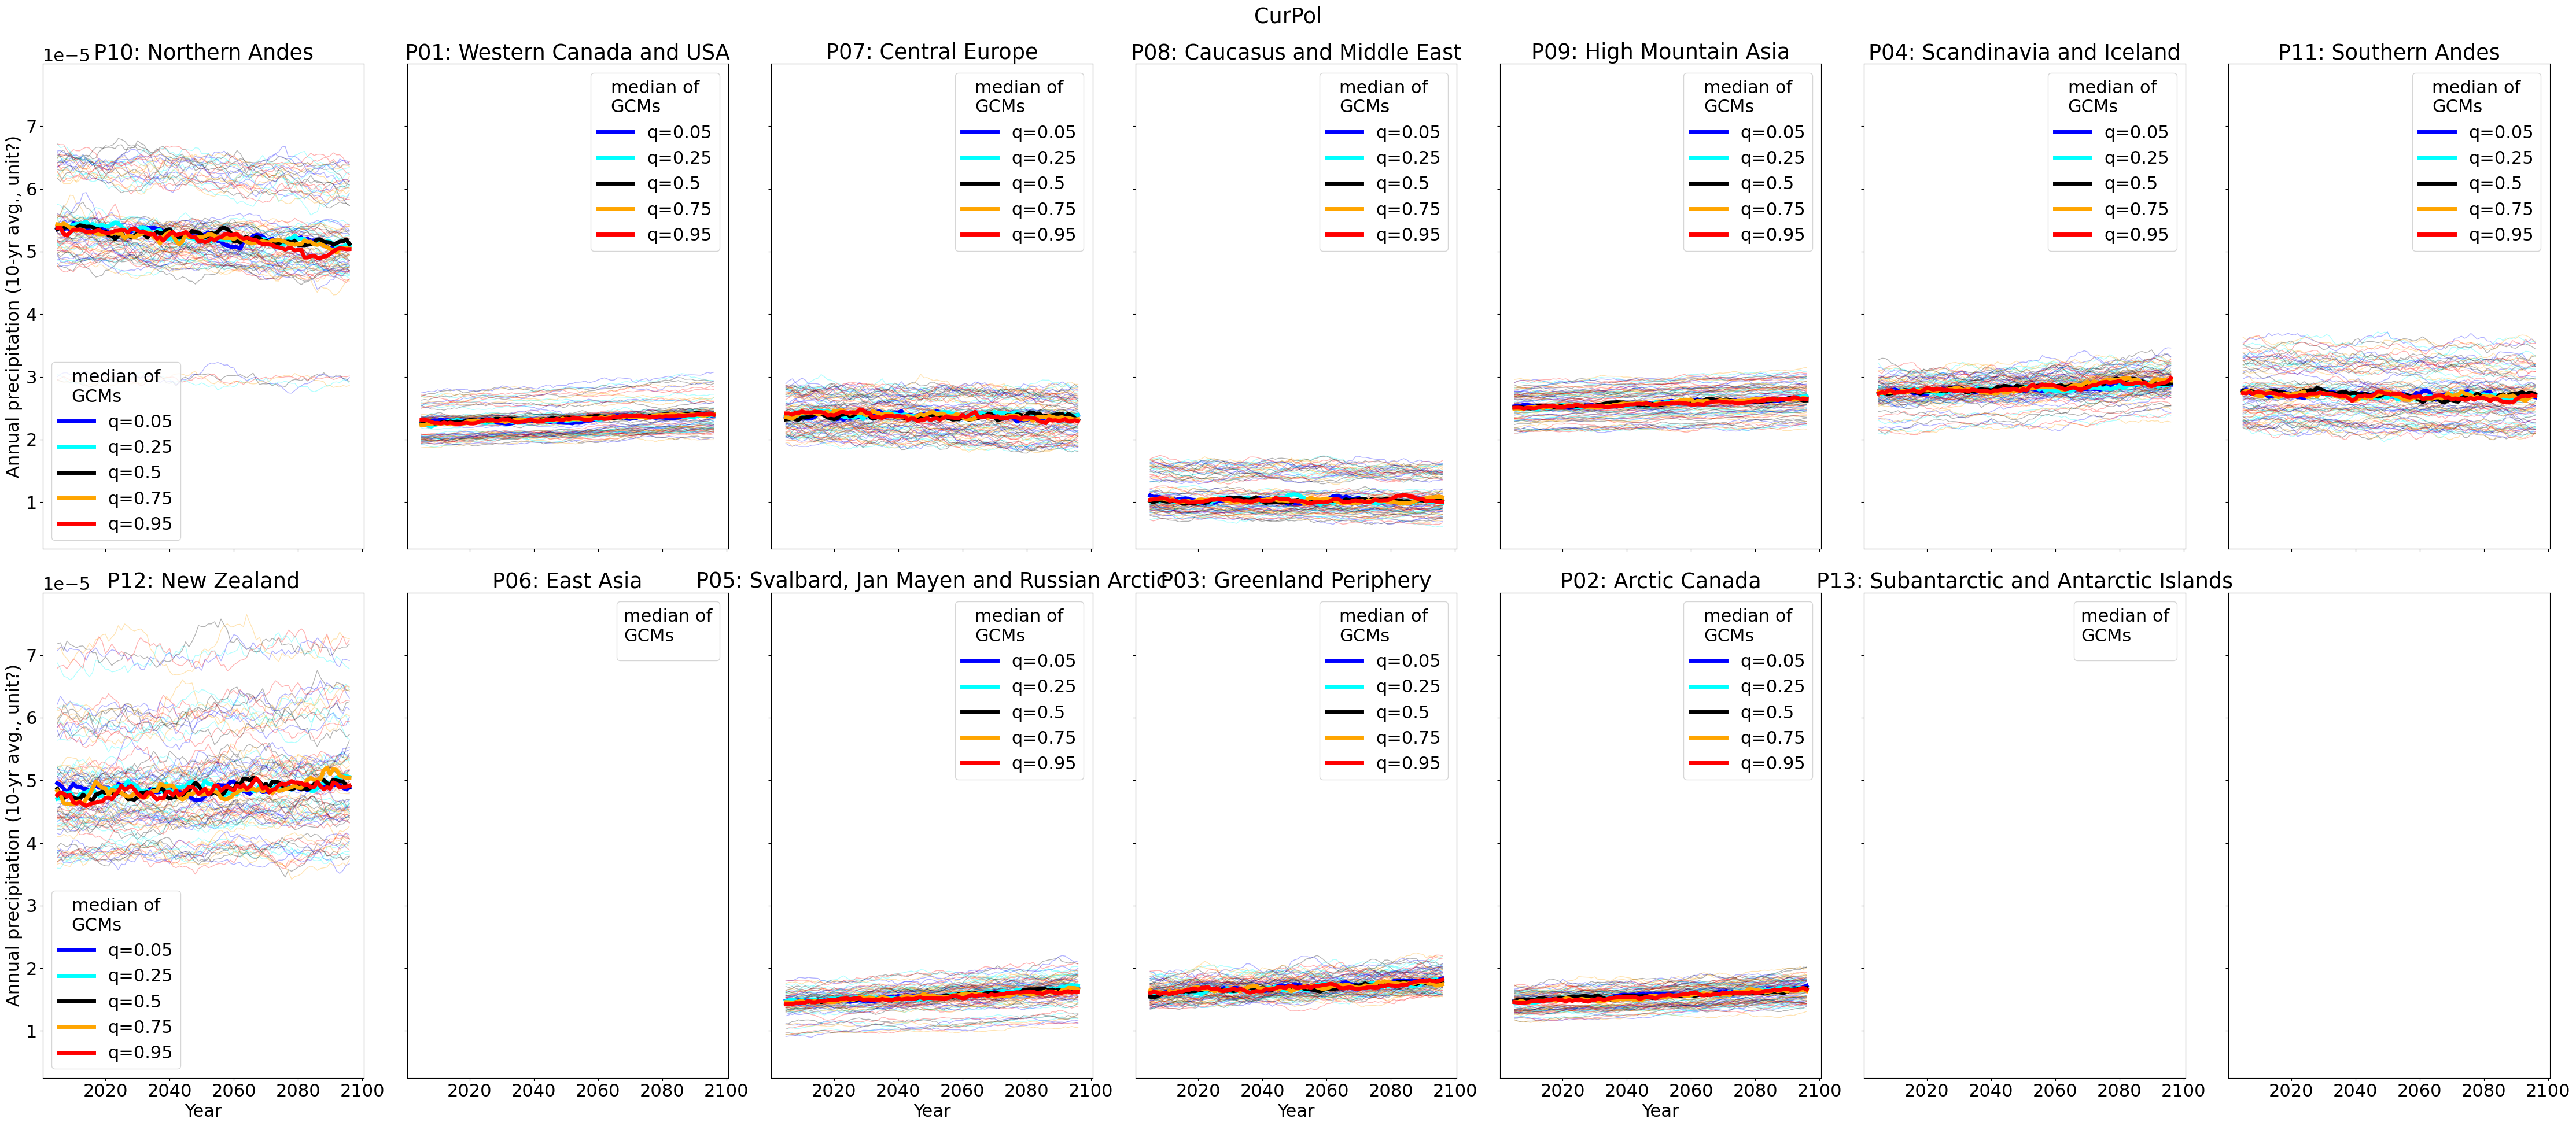

In [137]:
gcms_mesmer_no_ip =gcms_mesmer.copy()
gcms_mesmer_no_ip.remove('IPSL-CM6A-LR')
plt.rc('font', size=22)
for variable in ['pr']:
    var = 'tas' # wrong variable name in pr datasets ... 
    for scenario in scenarios:
        fig_per_yr, axs_per_yr = plt.subplots(2,7, figsize=(45,20), sharey=True, sharex=True) #, sharey=True, sharex=True)
        axs_per_yr = axs_per_yr.flatten()
        #fig_cum, axs_cum = plt.subplots(2,7, figsize=(45,20), sharey=True, sharex=True) #, sharey=True, sharex=True)
        #axs_cum = axs_cum.flatten()
        for j,region in enumerate(provide_reg_full_name_shruti_to_Preg.keys()):
        #for j,region in enumerate(['Northern_Andes']):

            fig_per_yr.suptitle(f'{scenario}')

            ax_per_yr = axs_per_yr[j]
            p = provide_reg_full_name_shruti_to_Preg[region]
            full_name_nice = provide_reg_full_name_dict_correct[p] #['full_name']

            # to create medians
            per_yr_model_dict_quantile = {}
            for q in ([0.05, 0.25, 0.5 , 0.75, 0.95]):
                per_yr_model_dict_quantile[q] = []
            for model in gcms_mesmer_no_ip:
                try:
                    ds = xr.open_dataset(f'88.198.17.222/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/{model}_{region}_{variable}_mon_{scenario}_g025.nc')
                    try:
                        np.testing.assert_allclose(ds.std(dim='quantiles')[var],0, atol=1e-10)
                        # ok, sth. is wrong 
                        #print(f'quantiles are all the same: {model}, {region}, {scenario}')
                    except:
                        pass
                    ds = ds.sel(time=slice('2000','2100'))
                    # weight over the latitudes region (but this does not make a big difference for this region),
                    weights = np.cos(np.deg2rad(ds['lat']))
                    weights = weights / weights.sum()
                    ds_reg = ds.tas.weighted(weights).mean(dim='grid_points')

                    # peak_yr -> only approximately as it is here estimated from the 5 quantiles
                    peak_yr = ds_reg.mean(dim='quantiles').groupby('time.year').mean('time', skipna=True).argmax('year').values
                    cumsum =ds_reg.groupby('time.year').mean('time',skipna=True).rolling(year=10, center=True\
                                                      ).mean(skipna=True).isel({'year':slice(0,peak_yr+1)}).sum('year')


                    # get annual temperatures and then do the 10-yr rolling mean
                    ds_year_var = ds[var].weighted(weights).mean(dim='grid_points').groupby('time.year').mean('time', skipna=True)
                    #peak_yr = ds.mean(dim='quantiles')[var].weighted(weights).mean(dim='grid_points').groupby('time.year').mean('time', skipna=True).argmax('year').values
                    ds_year_var = ds_year_var.rolling(year=10, center=True).mean().dropna(dim='year')


                    # compute the cumulative sum (important, need to set the dimension over which we compute the cumulative sum,
                    # i.e. here dim='year' (or "dim='time'" if you do it on the monthly resolution ...) 
                    #ds_yr_cum_sum = ds_year_tas.cumsum(dim='year')
                    #for qi,q in enumerate(ds_yr_cum_sum.quantiles.values):
                    #    ax.plot(ds_yr_cum_sum.year,
                    #             ds_yr_cum_sum.sel(quantiles=q), color=colors[qi], label=f'q={q}', lw=2, alpha =0.4)


                    ax = ax_per_yr

                    #ds_yr_roll = ds_year_tas#.weighted(weights).mean(dim='grid_points')
                    #for qi,q in enumerate(ds_yr_roll.quantiles.values):
                    #    ax.plot(ds_yr_roll.year,
                    #             ds_yr_roll.sel(quantiles=q), color=colors[qi], label=f'q={q}', lw=2, alpha =0.8)

                    ds_yr_roll = ds_year_var.weighted(weights).mean(dim='grid_points')
                    for qi,q in enumerate(ds_yr_roll.quantiles.values):
                        ax.plot(ds_yr_roll.year,
                                 ds_yr_roll.sel(quantiles=q), color=colors[str(q)], lw=1, ls='-', alpha = 0.3)
                        per_yr_model_dict_quantile[q].append(ds_yr_roll.sel(quantiles=q).to_dataframe()[var])
                    #if model == gcms_mesmer[0]:
                    #    ax.legend(title='quantiles')
                    if (j == 0) or (j==7):
                        if variable == 'tas':
                            ax.set_ylabel(f'Annual temperature anomaly (10-yr avg.)')
                        else:
                            ax.set_ylabel(f'Annual precipitation (10-yr avg., unit?)')

                    if j>=7:
                        ax.set_xlabel('Year')

                except:
                    pass #print(region, model, ds.grid_points.values, scenario)

                
            for qi,q in enumerate([0.05, 0.25, 0.5 , 0.75, 0.95]):
                try:
                    _p = pd.concat(per_yr_model_dict_quantile[q], axis=1).median(axis=1)
                    if region == 'Central_Europe':
                        print('amount of GCMs',variable, region, scenario, len(pd.concat(per_yr_model_dict_quantile[q], axis=1).columns))
                    ax_per_yr.plot(_p.index, _p.values, lw=5, color=colors[str(q)], label=f'q={q}')
                except:
                    print(region, scenario)
            ax_per_yr.legend(title='median of\nGCMs')


            ax_per_yr.set_title(f'{p}: {full_name_nice}')

        fig_per_yr.tight_layout()
        fig_per_yr.savefig(f'mesmer-m_climate_plot/no_ipsl_{variable}_mon_annual_per_yr_{scenario}.png')

        if scenario !='CurPol':
            plt.close()

### Precipitation is too high  sometimes for one GCM, let's check:

In [126]:
dw5e5_ref = xr.open_dataset('/home/www/oggm/climate/gswp3-w5e5/unflattened/monthly/gswp3-w5e5_obsclim_pr_global_monthly_1901_2019.nc').pr#.groupby('time.year').mean().sel(year=2000).mean()
print(dw5e5_ref.groupby('time.year').mean().max().values *60*60*24) # average 

47.112724743783474


In [127]:
dw5e5_ref = xr.open_dataset('/home/www/oggm/climate/gswp3-w5e5/flattened/2023.2/monthly/gswp3-w5e5_obsclim_pr_global_monthly_1901_2019_flat_glaciers.nc').pr#.groupby('time.year').mean().sel(year=2000).mean()
print(dw5e5_ref.groupby('time.year').mean().max().values *60*60*24) # average over glacier gridpoints 

29.078742396086454


In [125]:
variable = 'pr'
for j,region in enumerate(provide_reg_full_name_shruti_to_Preg.keys()):
    for model in gcms_mesmer:
        for scenario in scenarios:
            try:
                ds = xr.open_dataset(f'88.198.17.222/mesmer-m-processed/mesmer-m-processed/{model}/glacier_modellers/{model}_{region}_{variable}_mon_{scenario}_g025.nc').sel(time=slice('2000','2100'))
                weights = np.cos(np.deg2rad(ds['lat']))
                weights = weights / weights.sum()
                for q in [0.05,0.25,0.5,0.75,0.95]:
                    max_val = ds.weighted(weights).mean(dim='grid_points').groupby('time.year').mean().tas.sel(quantiles=q).max().values *60*60*24 # seconds to days , 
                    if max_val > 5e-04*60*60*24:
                        print(model, region, scenario, f'quantile: {q}' , 'maximum annual prcp: ',max_val.round(2), 'kg m-2 day-1 ???')
            except:
                pass

IPSL-CM6A-LR Northern_Andes GS quantile: 0.95 maximum annual prcp:  72.31 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East CurPol quantile: 0.25 maximum annual prcp:  68.06 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East CurPol quantile: 0.75 maximum annual prcp:  194.95 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East CurPol quantile: 0.95 maximum annual prcp:  47.15 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East GS quantile: 0.05 maximum annual prcp:  154.26 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East GS quantile: 0.25 maximum annual prcp:  177.4 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East GS quantile: 0.95 maximum annual prcp:  4366.82 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East LD quantile: 0.05 maximum annual prcp:  51.2 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East LD quantile: 0.25 maximum annual prcp:  88.55 kg m-2 day-1 ???
IPSL-CM6A-LR Caucasus_and_Middle_East LD quantile: 0.5 maximum annual prcp:  45.76 kg 

In [123]:
ds.weighted(weights).mean(dim='grid_points').groupby('time.year').mean()

<xarray.Dataset>
Dimensions:    (quantiles: 5, year: 101)
Coordinates:
  * quantiles  (quantiles) float64 0.05 0.25 0.5 0.75 0.95
  * year       (year) int64 2000 2001 2002 2003 2004 ... 2097 2098 2099 2100
Data variables:
    tas        (year, quantiles) float64 nan nan nan nan nan ... nan nan nan nan
    lat        (year) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    lon        (year) float64 nan nan nan nan nan nan ... nan nan nan nan nan

- weight over the latitudes region (but this does not make a big difference for this region), i.e. the simple non-weighted average gives similar estimates

## Other analysis using the old version data ..

/tmp/ipykernel_2099950/1864670418.py:5: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/tmp/ipykernel_2099950/1864670418.py:5: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))


Text(0.5, 0, 'Year')

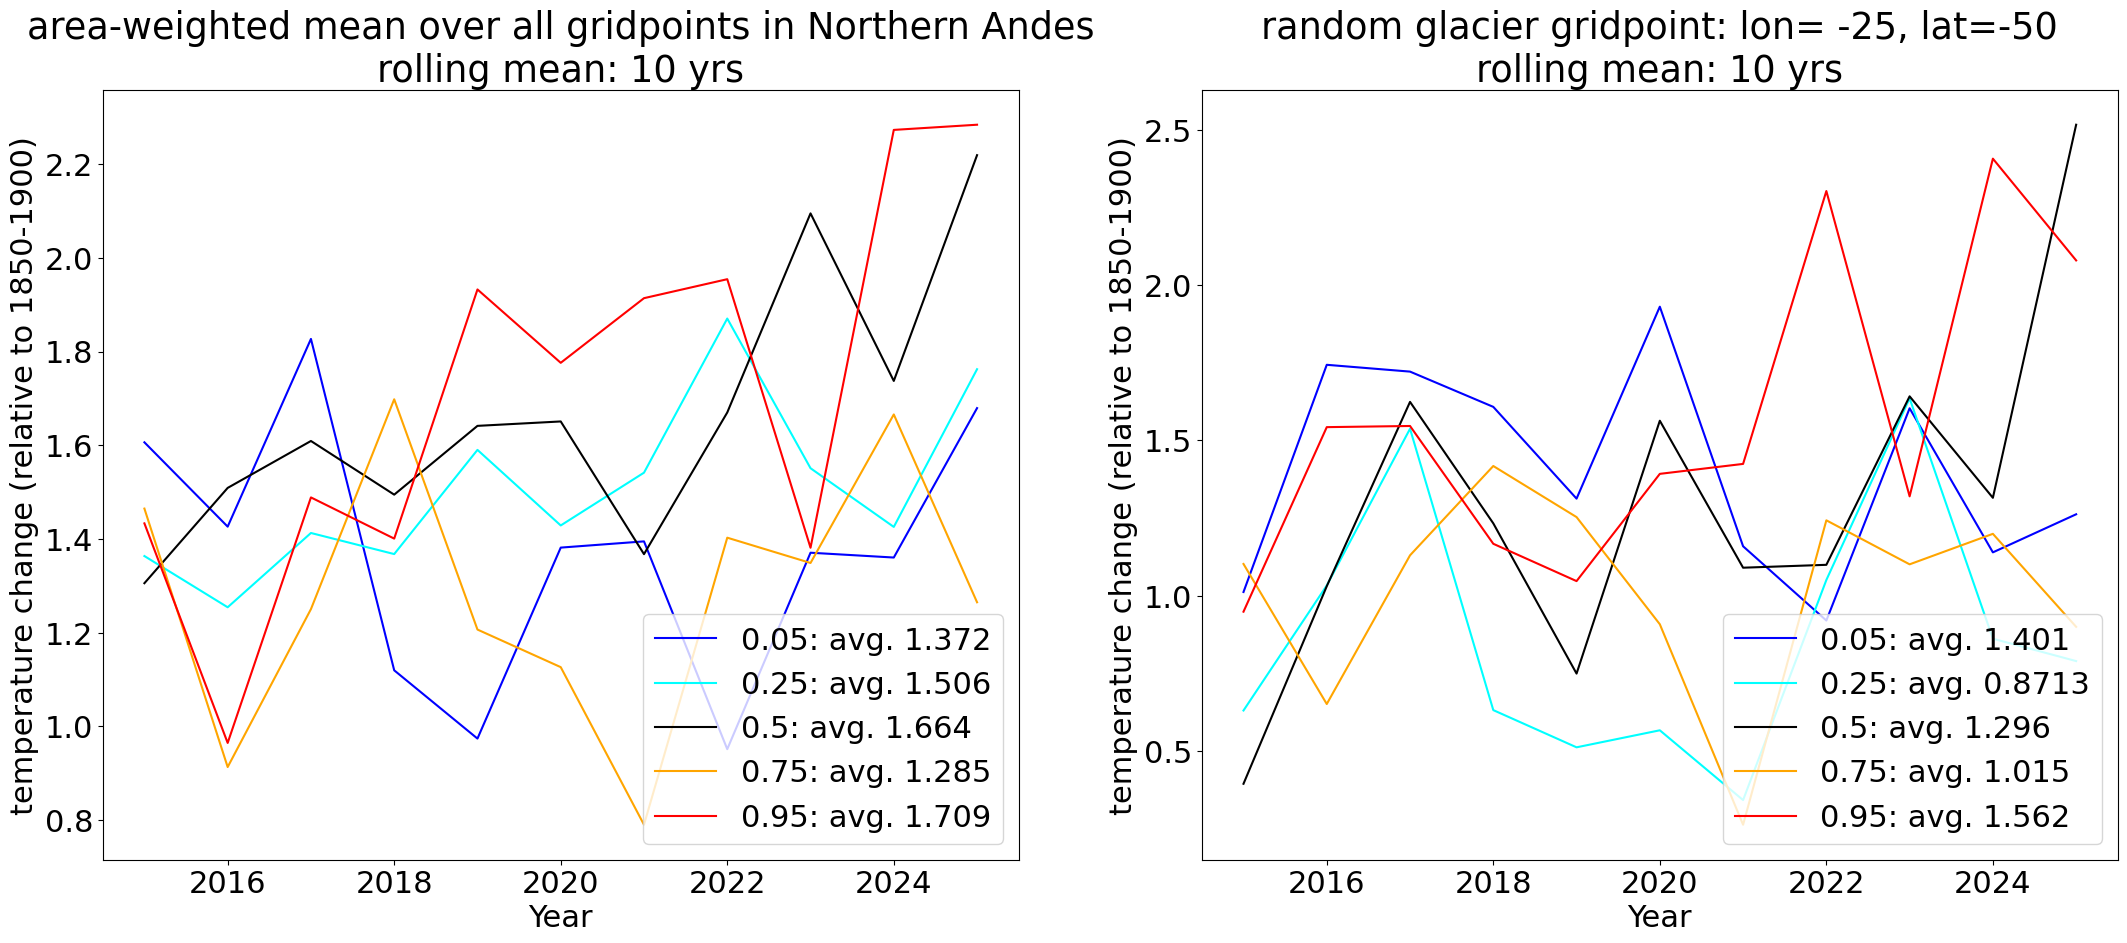

In [13]:
plt.figure(figsize=(26,10))
plt.rc('font', size=22)
plt.subplot(121)
ds_year_tas = ds.tas.groupby('time.year').mean()#.rolling(year=10, center=True).mean()
weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
weights = weights / weights.sum()
#ds_year_tas_m = (ds_year_tas * weights).sum(dim=['lat', 'lon']) / weights.sum(dim=['lat', 'lon'])
ds_year_tas_m = ds_year_tas.weighted(weights).mean(dim='grid_points').sel(year=slice(2015,2025)) # ds_year_tas.mean(dim='grid_points', weight = weights)
q=0.5
colors = ['blue', 'cyan', 'black', 'orange', 'red']
for qi,q in enumerate(ds_sel.quantiles.values):
    mean = ds_year_tas_m.sel({'quantiles':q}).mean().values
    plt.plot(ds_year_tas_m.year, ds_year_tas_m.sel({'quantiles':q}), label=f'{q}: avg. {mean:.4}',
             color = colors[qi])
plt.legend(loc='lower right')
plt.ylabel('temperature change (relative to 1850-1900)')
plt.title(f'area-weighted mean over all gridpoints in Northern Andes\nrolling mean: 10 yrs')
plt.xlabel('Year')
plt.subplot(122)
ds_sel_year_tas = ds_sel.tas.groupby('time.year').mean().sel(year=slice(2015,2025)) #.rolling(year=10, center=True).mean()
q=0.5
colors = ['blue', 'cyan', 'black', 'orange', 'red']
for qi,q in enumerate(ds_sel.quantiles.values):
    mean = ds_sel_year_tas.sel({'quantiles':q}).mean().values
    plt.plot(ds_sel_year_tas.year, ds_sel_year_tas.sel({'quantiles':q}), label=f'{q}: avg. {mean:.4}',
             color = colors[qi])
plt.legend(loc='lower right')
plt.ylabel('temperature change (relative to 1850-1900)')
plt.title(f'random glacier gridpoint: lon= {glon}, lat={glat}\nrolling mean: 10 yrs')
plt.xlabel('Year')


/tmp/ipykernel_2099950/1090269715.py:5: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/tmp/ipykernel_2099950/1090269715.py:5: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))


Text(0.5, 0, 'Year')

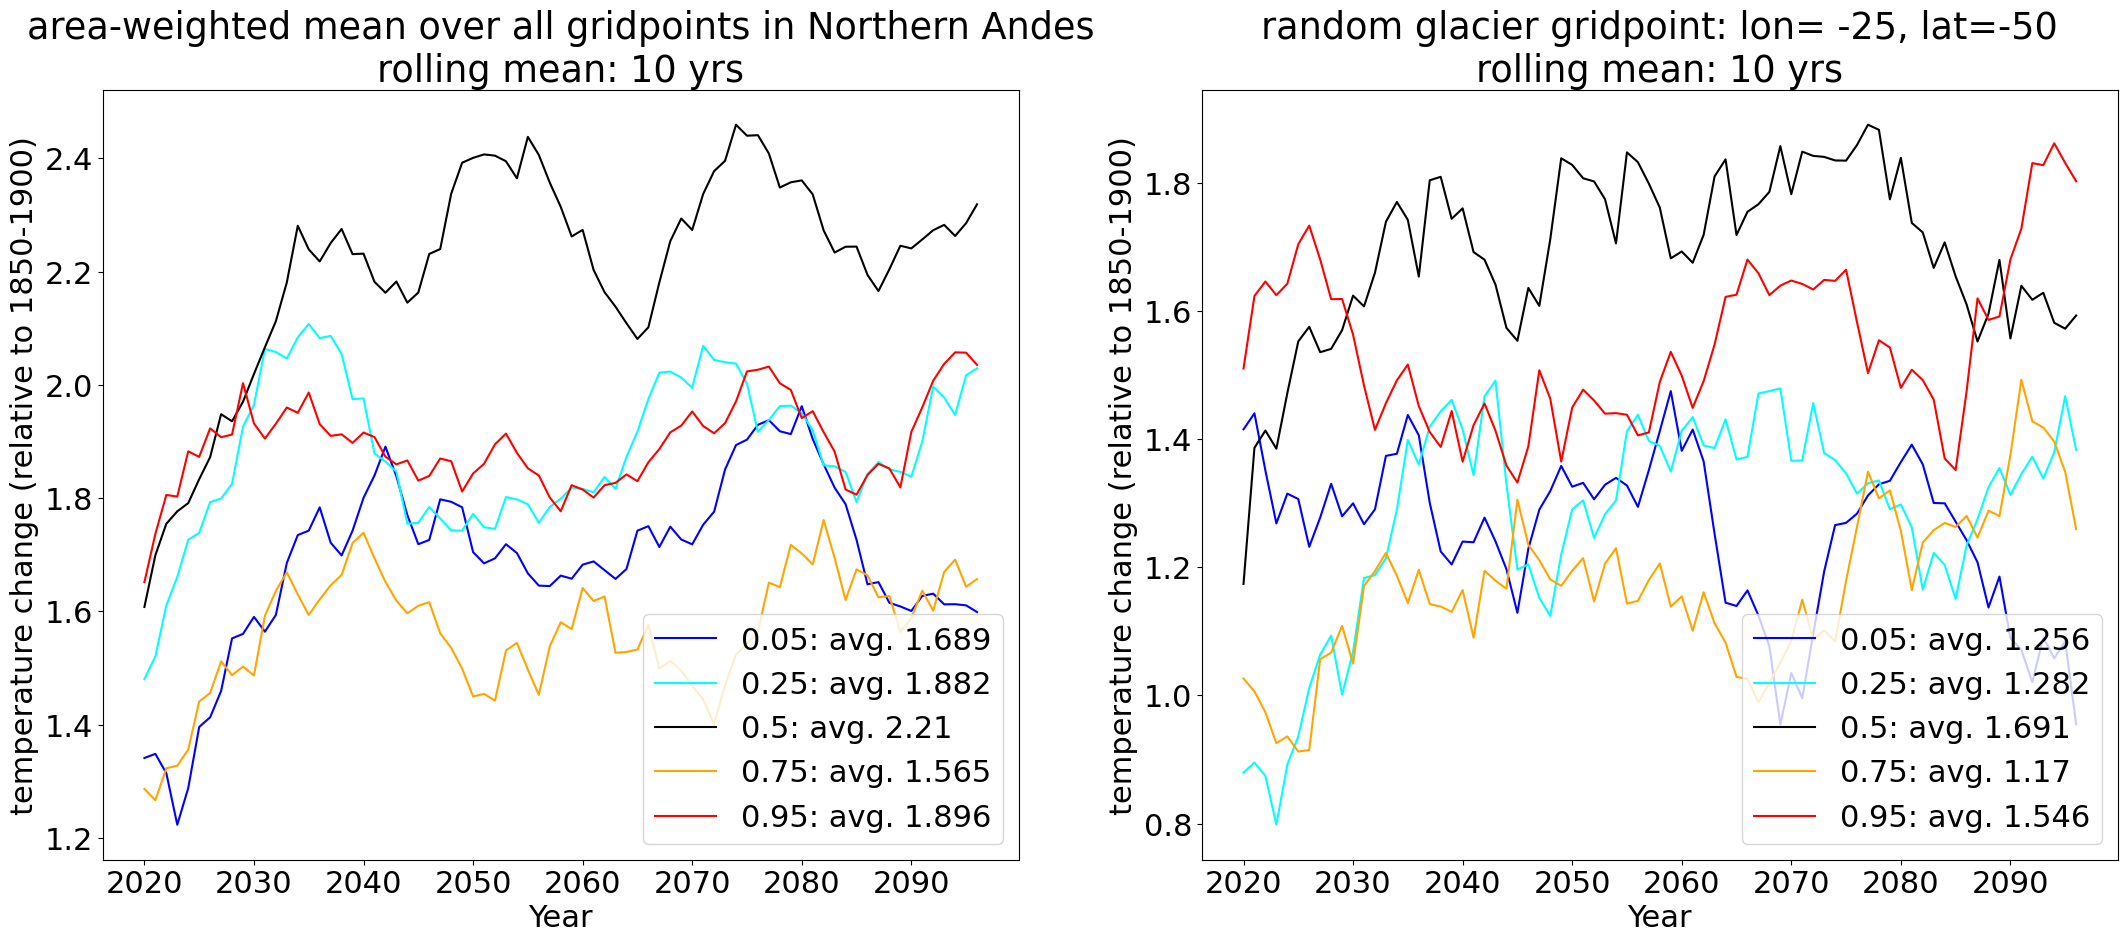

In [15]:
plt.figure(figsize=(26,10))
plt.rc('font', size=22)
plt.subplot(121)
ds_year_tas = ds.tas.groupby('time.year').mean().rolling(year=10, center=True).mean()
weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
weights = weights / weights.sum()
#ds_year_tas_m = (ds_year_tas * weights).sum(dim=['lat', 'lon']) / weights.sum(dim=['lat', 'lon'])
ds_year_tas_m = ds_year_tas.weighted(weights).mean(dim='grid_points') # ds_year_tas.mean(dim='grid_points', weight = weights)
q=0.5
colors = ['blue', 'cyan', 'black', 'orange', 'red']
for qi,q in enumerate(ds_sel.quantiles.values):
    mean = ds_year_tas_m.sel({'quantiles':q}).mean().values
    plt.plot(ds_year_tas_m.year, ds_year_tas_m.sel({'quantiles':q}), label=f'{q}: avg. {mean:.4}',
             color = colors[qi])
plt.legend(loc='lower right')
plt.ylabel('temperature change (relative to 1850-1900)')
plt.title(f'area-weighted mean over all gridpoints in Northern Andes\nrolling mean: 10 yrs')
plt.xlabel('Year')
plt.subplot(122)
ds_sel_year_tas = ds_sel.tas.groupby('time.year').mean().rolling(year=10, center=True).mean()
q=0.5
colors = ['blue', 'cyan', 'black', 'orange', 'red']
for qi,q in enumerate(ds_sel.quantiles.values):
    mean = ds_sel_year_tas.sel({'quantiles':q}).mean().values
    plt.plot(ds_sel_year_tas.year, ds_sel_year_tas.sel({'quantiles':q}), label=f'{q}: avg. {mean:.4}',
             color = colors[qi])
plt.legend(loc='lower right')
plt.ylabel('temperature change (relative to 1850-1900)')
plt.title(f'random glacier gridpoint: lon= {glon}, lat={glat}\nrolling mean: 10 yrs')
plt.xlabel('Year')


/tmp/ipykernel_4026740/392955901.py:5: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/tmp/ipykernel_4026740/392955901.py:5: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
/home/users/lschuster/.local/lib/python3.10/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))


Text(0.5, 0, 'Year')

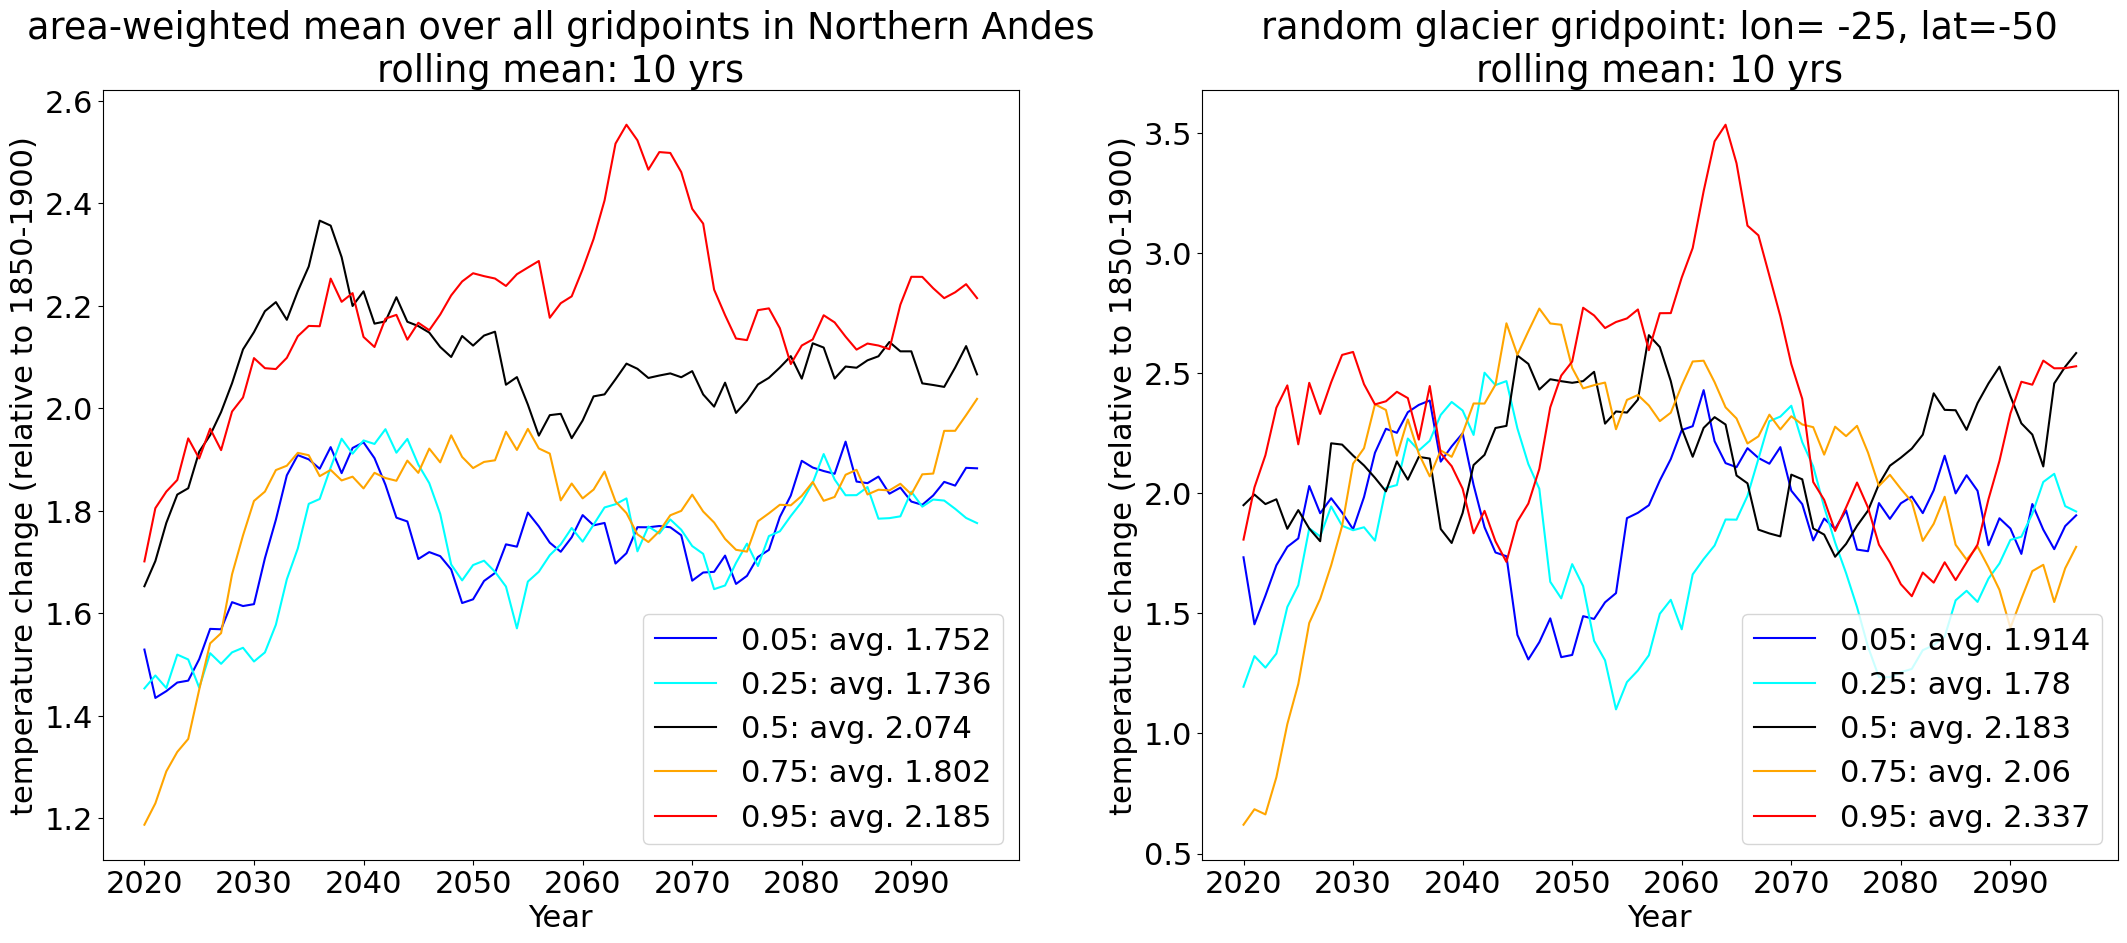

In [135]:
plt.figure(figsize=(26,10))
plt.rc('font', size=22)
plt.subplot(121)
ds_year_tas = ds.tas.groupby('time.year').mean().rolling(year=10, center=True).mean()
weights = xr.ufuncs.cos(xr.ufuncs.deg2rad(ds['lat']))
weights = weights / weights.sum()
#ds_year_tas_m = (ds_year_tas * weights).sum(dim=['lat', 'lon']) / weights.sum(dim=['lat', 'lon'])
ds_year_tas_m = ds_year_tas.weighted(weights).mean(dim='grid_points') # ds_year_tas.mean(dim='grid_points', weight = weights)
q=0.5
colors = ['blue', 'cyan', 'black', 'orange', 'red']
for qi,q in enumerate(ds_sel.quantiles.values):
    mean = ds_year_tas_m.sel({'quantile':qi}).mean().values
    plt.plot(ds_year_tas_m.year, ds_year_tas_m.sel({'quantile':qi}), label=f'{q}: avg. {mean:.4}',
             color = colors[qi])
plt.legend(loc='lower right')
plt.ylabel('temperature change (relative to 1850-1900)')
plt.title(f'area-weighted mean over all gridpoints in Northern Andes\nrolling mean: 10 yrs')
plt.xlabel('Year')
plt.subplot(122)
ds_sel_year_tas = ds_sel.tas.groupby('time.year').mean().rolling(year=10, center=True).mean()
q=0.5
colors = ['blue', 'cyan', 'black', 'orange', 'red']
for qi,q in enumerate(ds_sel.quantiles.values):
    mean = ds_sel_year_tas.sel({'quantile':qi}).mean().values
    plt.plot(ds_sel_year_tas.year, ds_sel_year_tas.sel({'quantile':qi}), label=f'{q}: avg. {mean:.4}',
             color = colors[qi])
plt.legend(loc='lower right')
plt.ylabel('temperature change (relative to 1850-1900)')
plt.title(f'random glacier gridpoint: lon= {glon}, lat={glat}\nrolling mean: 10 yrs')
plt.xlabel('Year')


In [38]:
ds.swap_dims({'grid_points':['lat', 'lon']})

TypeError: unhashable type: 'list'

In [27]:
ds.grid_points.sel(lat=-26.25)

KeyError: 'no index found for coordinate lat'

KeyError: 'no index found for coordinate lat'